In [1]:
import datetime as dt # to set starting and end date for data we gonna pull
import matplotlib.pyplot as plt 
from matplotlib import style
import pandas as pd 
import pandas_datareader.data as web 

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime.now()

df = web.DataReader('TSLA','yahoo',start,end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df.head()





,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [2]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-23,737.359985,715.460022,719.799988,729.400024,28370000.0,729.400024
2021-04-26,749.299988,732.609985,741.000000,738.200012,31038500.0,738.200012
2021-04-27,724.000000,703.349976,717.960022,704.739990,29437000.0,704.739990
2021-04-28,708.500000,693.599976,696.409973,694.400024,22196500.0,694.400024
2021-04-29,702.166016,678.299988,699.510010,681.890015,11517186.0,681.890015


#### Handling data & Graphing

In [3]:
df.to_csv('tesla.csv')

In [4]:
df.shape

(2728, 6)

In [5]:
df = pd.read_csv('tesla.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [6]:
df = pd.read_csv('tesla.csv',parse_dates=True,index_col = 0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


<AxesSubplot:xlabel='Date'>

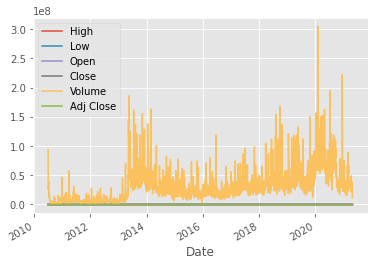

In [7]:
df.plot()
#plt.show if not on jyupter-notebook

<AxesSubplot:xlabel='Date'>

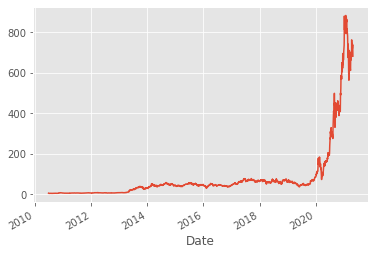

In [8]:
df['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

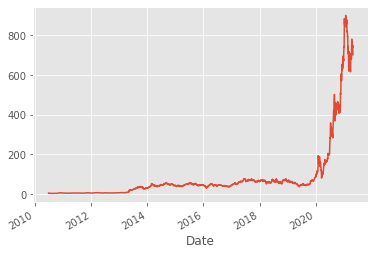

In [9]:
df['High'].plot()

In [10]:
df[['High','Low']].head()

,High,Low
Date,,
2010-06-29,5.000,3.508
2010-06-30,6.084,4.660
2010-07-01,5.184,4.054
2010-07-02,4.620,3.742
2010-07-06,4.000,3.166


#### Data Manipulation

In [11]:
#df['100ma'] = df['Adj Close'].rolling(window = 100).mean()
#df.head()

In [12]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-23,737.359985,715.460022,719.799988,729.400024,28370000.0,729.400024
2021-04-26,749.299988,732.609985,741.000000,738.200012,31038500.0,738.200012
2021-04-27,724.000000,703.349976,717.960022,704.739990,29437000.0,704.739990
2021-04-28,708.500000,693.599976,696.409973,694.400024,22196500.0,694.400024
2021-04-29,702.166016,678.299988,699.510010,681.890015,11517186.0,681.890015


In [13]:
#df.dropna(inplace = True)
#df.head()

In [14]:
df['100ma'] = df['Adj Close'].rolling(window = 100,min_periods = 0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778,4.778000
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766,4.772000
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392,4.645333
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840,4.444000
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222,4.199600


<BarContainer object of 2728 artists>

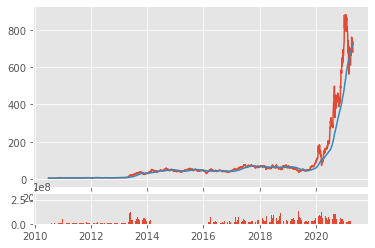

In [15]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan = 5, colspan = 1) #first parameter is gridsize,2nd is starting point
ax2 = plt.subplot2grid((6,1),(5,0),rowspan = 1, colspan = 1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])

<BarContainer object of 2728 artists>

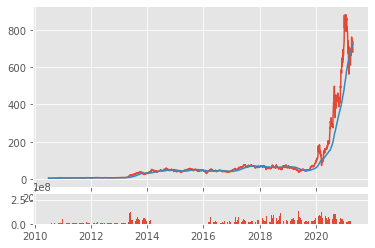

In [16]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan = 5, colspan = 1) #first parameter is gridsize,2nd is starting point
ax2 = plt.subplot2grid((6,1),(5,0),rowspan = 1, colspan = 1,sharex=ax1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])

#### More Data Manipulation

In [17]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

In [18]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,4.778,4.778,3.160,3.492
2010-07-09,3.480,4.128,3.410,4.128
2010-07-19,4.382,4.382,4.044,4.144
2010-07-29,4.070,4.390,3.918,3.918
2010-08-08,3.920,3.920,3.520,3.830


In [19]:
import mplfinance as mpf
import matplotlib.dates as mdates

In [20]:
# CandleStick wants open,high,low,close and as well as dates in dates format

In [21]:
#df_ohlc.reset_index(inplace = True)
#df_ohlc.head()

In [22]:
#df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
#df_ohlc.head()

In [23]:
#ax1 = plt.subplot2grid((6,1),(0,0),rowspan = 5, colspan = 1) 
#ax2 = plt.subplot2grid((6,1),(5,0),rowspan = 1, colspan = 1,sharex=ax1)
#ax1.xaxis_dates()

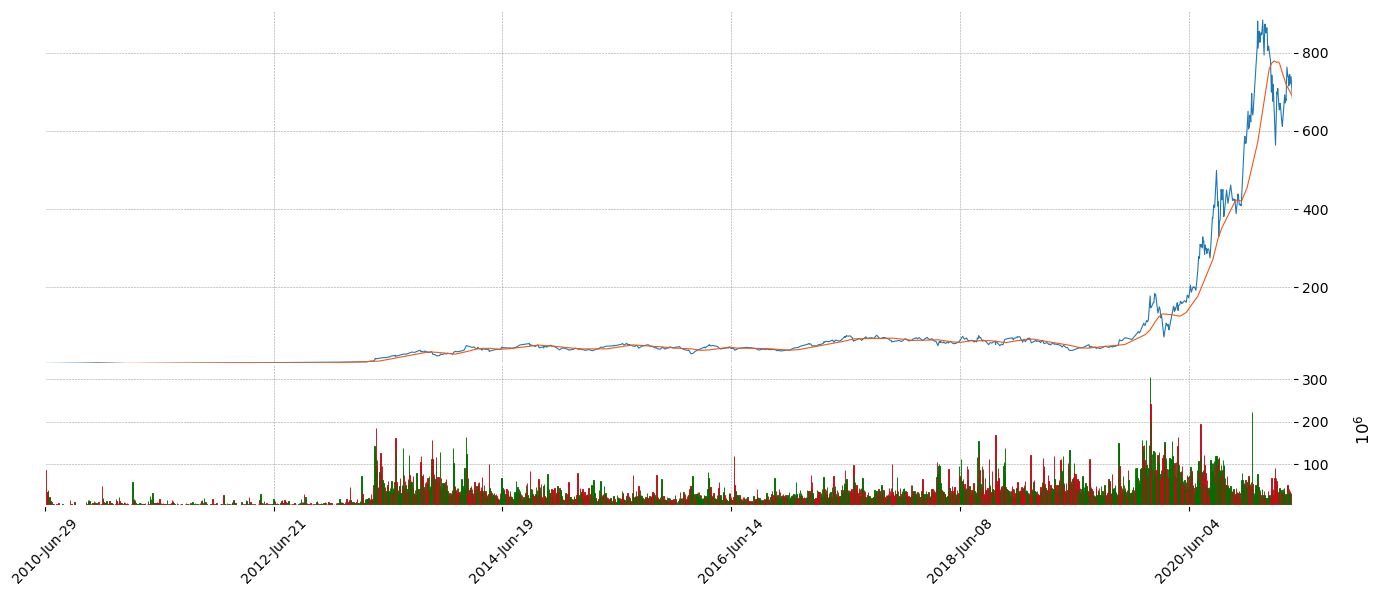

In [24]:
mpf.plot(df, type='line', style='charles',

            title='  ',

            ylabel='  ',

            ylabel_lower='  ',

            figratio=(25,10),

            figscale=1,

            mav=50,

            volume=True,
         
            tight_layout=True

            )

/home/spooderman/.local/lib/python3.9/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


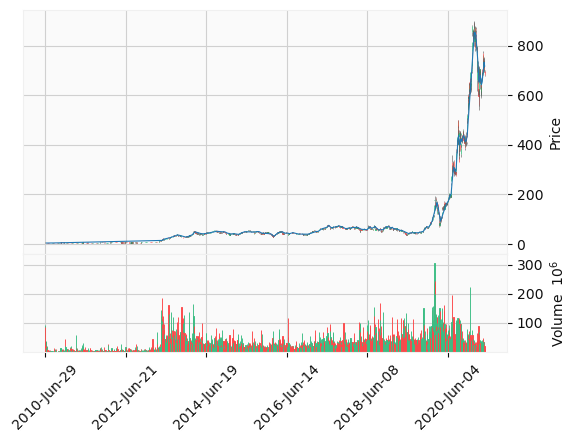

In [25]:
mpf.plot(df,type='candle',mav=10,volume=True,figratio=(11,8),figscale=.85,style='yahoo')

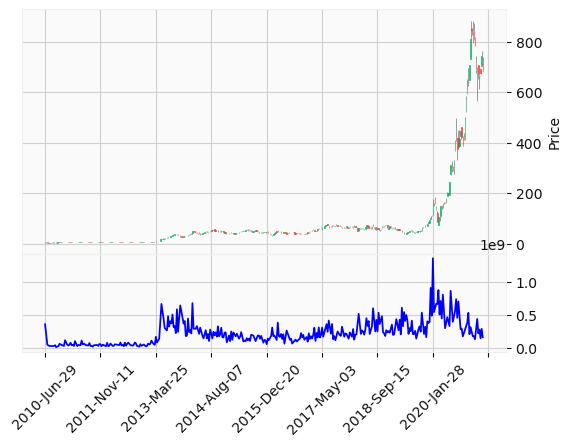

In [26]:
df_ohlc.columns = df_ohlc.columns.str.capitalize()
df_volume = mpf.make_addplot(df_volume,panel=1,color='b')
mpf.plot(df_ohlc,addplot=df_volume,type='candle',volume=False,figratio=(11,8),figscale=.85,style='yahoo')

ValueError: not enough values to unpack (expected 5, got 4)

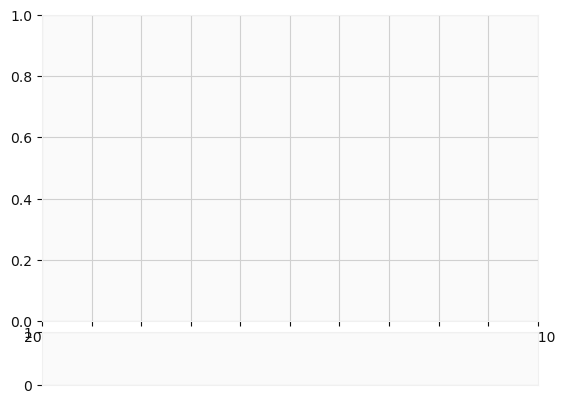

In [27]:
from mplfinance.original_flavor import candlestick_ohlc

ax1 = plt.subplot2grid((6,1),(0,0),rowspan = 5, colspan = 1) 
ax2 = plt.subplot2grid((6,1),(5,0),rowspan = 1, colspan = 1,sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values,width=2,colorup='g',colordown='r')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

#### Automating getting the S&P 500 list

In [ ]:
import bs4 as bs
import pickle  #serializes any python object
import requests

def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text,'lxml')
    table = soup.find('table',{'class':'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text # .text cause it's a soup object and we want it to be strings of py
        tickers.append(ticker)
    
    with open('sp500tickers.pickle','wb') as f:
        pickle.dump(tickers,f)
    
    print(tickers)
    
    return tickers
    
save_sp500_tickers()
        

        

In [ ]:
import datetime as dt
import os 
import pandas as pd
import pandas_datareader.data as web

In [1]:
import bs4 as bs
import datetime as dt
import os
from pandas_datareader import data as pdr
import pickle
import requests
import fix_yahoo_finance as yf

#yf.pdr_override()

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text.replace('.', '-')
        ticker = ticker[:-1]
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers


# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    start = dt.datetime(2019, 6, 8)
    end = dt.datetime.now()
    for ticker in tickers[:10]:
        print(ticker)
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


save_sp500_tickers()
get_data_from_yahoo()

/home/spooderman/.local/lib/python3.9/site-packages/fix_yahoo_finance/__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES


#### Combining S&P 500 into one DataFrame


In [ ]:
def compile_data():
    with open('sp500tickers.pickle','rb') as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for ticker in tickers[:10]: #enumerate means counting through range len of smth
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date',inplace = True)
        
        df.rename(columns = {'Adj Close':ticker},inplace = True)
        df.drop(['Open','Close','High','Low','Volume'],1,inplace = True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df,how='outer') #helps us not to loose data for anybody
            
        #if count%2 == 0:
            #print(count)
            
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')
    

compile_data()
        

#### S&P 500 company correlation table


In [ ]:
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    #df['AMD'].plot()
    df_corr = df.corr()
    print(df_corr.head())
    
visualize_data()

In [ ]:
import numpy as np  
def visualize_data():
    #df = pd.read_csv('sp500_joined_closes.csv')
    #df['AMD'].plot()
    #df_corr = df.corr()
    
    df = pd.read_csv('sp500_joined_closes.csv') 
    df.set_index('Date', inplace=True) 
    df_corr = df.pct_change().corr() #in finance we calculate correlations between
                                     #stock returns and not stock prices,as returns 
                                     #tend to follow normal distribution and prices don't
    print(df_corr.head())
    
    data = df_corr.values  #gives numpy array for rows and columns
    
    fig = plt.figure()
    ax=fig.add_subplot(111)
    
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    
    ax.set_xticks(np.arange(data.shape[0])+0.5,minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5,minor=False)

    ax.invert_yaxis() # in most cases there's a gap in matplot graph which doesnot make sense in heatmap
    ax.xaxis.tick_top() #puts labels into top
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xtickslabels(column_labels)
    ax.set_ytickslabels(row_labels)
    
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1) # heatmap color limit
    plt.tight_layout()
    
visualize_data()

#### Preprocessing data for Machine Learning

In [ ]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv',index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0,inplace=True)
    
    for i in range(hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i)-df[ticker])/df[ticker] #shifting negative to get future data
        
    df.fillna(0,inplace=True)
    return ticker,df

process_data_for_labels('AMD')    

#### Creating machine learning target function

In [ ]:
def buy_sell_hold(*args):#allows us to pass any number of parameters
    cols = [c for c in args]
    requirement = 0.02
    
    for col in cols:
        if col > requirement:
            return 1 #buy
        if col<-requirement:
            return -1 #sell
    return 0 #hold 

#### Creating labels for Machine Learning

In [ ]:
from collections import Counter
def extract_featuresets(ticker):
    tickers,df = process_data_for_labels(ticker)
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,df['{}_1d'.format(ticker)], #after hold all these are 
                                                            df['{}_2d'.format(ticker)], #parameters that's how
                                                            df['{}_3d'.format(ticker)], #mapping works
                                                            df['{}_4d'.format(ticker)],
                                                            df['{}_5d'.format(ticker)],
                                                            df['{}_6d'.format(ticker)],
                                                            df['{}_7d'.format(ticker)]))
                                          
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:',Counter(str_vals)) #this will give us distribution
                                          
    df.fillna(0,inplace=True)
    df = df.replace([np.inf,-np.inf],np.NaN)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change() #normalize
    df_vals = df_vals.replace([np.inf,-np.inf],0)
    df_vals.fillna(0,inplace=True)
                                          
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
                                          
    return X, y, df
                                          
extract_featuresets('AMD')

#### Machine learning

In [ ]:
#from sklearn import svm, cross_validation, neighbors
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import VotingClassifier,RandomForestClassifier

#The svm import is for a Support Vector Machine, cross_validation will
#let us easily create shuffled training and testing samples, and neighbors is for K Nearest Neighbors. 

#The voting classifier is just what it sounds like. Basically, it's a classifier that will let us combine
#many classifiers, and allow them to each get a "vote" on what they think the class of the featuresets is. 
#The random forest classifier is just another classifier. We're going to use three classifiers in our voting 
#classifier.

In [ ]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25) #25% of our sample data will test against 
                                                                            # which will give accurancy
    
    clf = neighbors.KNeighborsClassifier() #defined our classifier
    clf.fit(X_train,Y_train) #X is the %change data for all company
                             #Y is the target hold,buy or sell
    # use the classifier that will fit input data to the target we're setting
    confidence = clf.score(X_test,y_test)
    predictions = clf.predict(X_test)
    
    print('Predicted spread:',Counter(predictions))
    
    return confidence

do_ml('AMD')

In [32]:
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests
from collections import Counter
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import VotingClassifier, RandomForestClassifier


style.use('ggplot')


def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers


# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'morningstar', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))


def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()


def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    df.fillna(0, inplace=True)
    return tickers, df


def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0


def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    return X, y, df


def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:', Counter(predictions))
    print()
    print()
    return confidence


# examples of running:
#do_ml('XOM')
#do_ml('AAPL')
#do_ml('ABT')
do_ml('AMD')

Data spread: Counter({'1': 257, '-1': 205, '0': 14})
accuracy: 0.48739495798319327
predicted class counts: Counter({1: 94, -1: 25})




0.48739495798319327